# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create empty list to store individual results.
lats =[]
max_temps=[]
humidity=[]
clouds=[]
windspeed=[]


In [4]:
# Setup settings
settings = {
    "units": "imperial",
    "appid": api_key
}

# Announce beginning of data retrieval process
print('Beginning Data Retrieval' + '\n-----------------------------')

# Get current weather
for city in cities:
    try:
        current_weather = owm.get_current(city, **settings)
    except:
        print("City " + city.title() + " not found. Skipping...")
    else:
        print('Processing Record ' + str(cities.index(city)) + ' | ' + city.title())
        lats.append(current_weather['coord']['lat'])
        max_temps.append(current_weather['main']['temp_max'])
        humidity.append(current_weather['main']['humidity'])
        clouds.append(current_weather['clouds']['all'])
        windspeed.append(current_weather['wind']['speed'])

# Announce completion of data retrieval process
print('-----------------------------')
print('Data Retrieval Complete')     
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 0 | Shache
Processing Record 1 | Sheridan
Processing Record 2 | Tera
Processing Record 3 | Brae
Processing Record 4 | Nishihara
Processing Record 5 | Qaanaaq
City Tsihombe not found. Skipping...
Processing Record 7 | Cockburn Town
Processing Record 8 | Khatanga
Processing Record 9 | Busselton
Processing Record 10 | Puerto Ayora
Processing Record 11 | Bredasdorp
Processing Record 12 | Jamestown
Processing Record 13 | Chokurdakh
Processing Record 14 | La Serena
Processing Record 15 | Punta Arenas
Processing Record 16 | Mount Gambier
Processing Record 17 | Saint-Philippe
Processing Record 18 | Hilo
Processing Record 19 | Port Alfred
Processing Record 20 | Kapaa
Processing Record 21 | Nikolskoye
Processing Record 22 | Hami
Processing Record 23 | Vagur
City Raga not found. Skipping...
Processing Record 25 | Barrow
Processing Record 26 | Palana
Processing Record 27 | Itarema
Processing Record 28 | Georgetown
Processing 

Processing Record 244 | Sobolevo
City Labrea not found. Skipping...
Processing Record 246 | Hailey
Processing Record 247 | Oda
Processing Record 248 | Embu
Processing Record 249 | Yenagoa
Processing Record 250 | Vanimo
Processing Record 251 | Benguela
Processing Record 252 | Maniitsoq
Processing Record 253 | Esperance
Processing Record 254 | Akureyri
City Saryshagan not found. Skipping...
Processing Record 256 | Channel-Port Aux Basques
Processing Record 257 | Muzhi
Processing Record 258 | Provideniya
Processing Record 259 | Necochea
Processing Record 260 | Kasongo-Lunda
Processing Record 261 | Puerto Baquerizo Moreno
Processing Record 262 | Tobane
Processing Record 263 | Amga
City Nizhneyansk not found. Skipping...
Processing Record 265 | Zhaodong
Processing Record 266 | Ixtapa
Processing Record 267 | Borba
Processing Record 268 | Labuan
Processing Record 269 | Suntar
Processing Record 270 | Pervomayskoye
Processing Record 271 | Kaabong
City Viligili not found. Skipping...
Processing 

Processing Record 489 | Moree
Processing Record 490 | Umm Lajj
Processing Record 491 | Sabha
City Malwan not found. Skipping...
Processing Record 493 | Kanbe
Processing Record 494 | Pio Ix
Processing Record 495 | Muyezerskiy
Processing Record 496 | Bournemouth
City Odweyne not found. Skipping...
Processing Record 498 | Road Town
Processing Record 499 | Pandan
Processing Record 500 | Tateyama
Processing Record 501 | Mayo
Processing Record 502 | Sackville
Processing Record 503 | Comodoro Rivadavia
Processing Record 504 | Eyl
Processing Record 505 | Gunjur
Processing Record 506 | Sola
Processing Record 507 | Miranda
Processing Record 508 | Hofn
Processing Record 509 | Bodaybo
Processing Record 510 | Dunedin
Processing Record 511 | Whitehorse
Processing Record 512 | Shieli
Processing Record 513 | Altamira
Processing Record 514 | Maues
Processing Record 515 | Saldanha
Processing Record 516 | Adrar
Processing Record 517 | Kushima
Processing Record 518 | Lavrentiya
Processing Record 519 | Mak

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create dictionary to hold all results
data = {
    'City':cities,
    'Lattitude': lats,
    'Max Temperature': max_temps,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': windspeed}
data_df = pd.DataFrame.from_dict(data, orient='index')
data_df = data_df.transpose()
data_df.head()

,City,Lattitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,shache,38.42,40.23,43,0,4.7
1,sheridan,39.65,46,48,20,5.82
2,tera,34.97,59,87,20,8.05
3,brae,60.4,39.2,94,20,14.99
4,nishihara,35.74,57,29,0,4.7


In [6]:
# Review data 
data_df.describe(include='all')

,City,Lattitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,605,536.00,536.0,536,536,536.0
unique,605,524.00,308.0,79,22,137.0
top,lagoa,36.62,75.2,100,0,4.7
freq,1,3.00,16.0,52,146,33.0


In [7]:
# Remove null records
data_df = data_df.dropna(how='any')
data_df.describe(include='all')

,City,Lattitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,536,536.00,536.0,536,536,536.0
unique,536,524.00,308.0,79,22,137.0
top,lagoa,36.62,75.2,100,0,4.7
freq,1,3.00,16.0,52,146,33.0


In [8]:
# Export data to csv file
data_df.to_csv('weather_data.csv', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

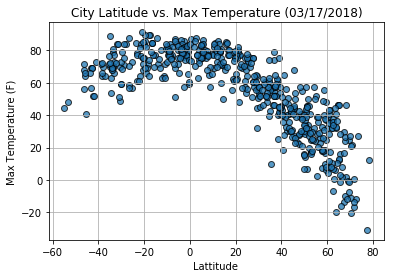

In [14]:
tempPlot = plt.scatter(data_df['Lattitude'],data_df['Max Temperature'],alpha=0.75, edgecolors='black')
plt.title('City Latitude vs. Max Temperature (03/17/2018)')
plt.xlabel('Lattitude ')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('maxTemp.png')

#### Latitude vs. Humidity Plot

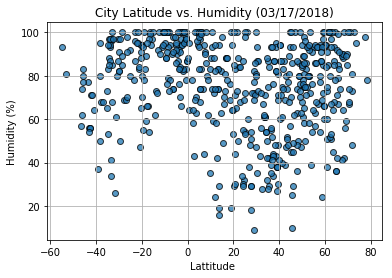

In [15]:
humidityPlot = plt.scatter(data_df['Lattitude'],data_df['Humidity'],alpha=0.75, edgecolors='black')
plt.title('City Latitude vs. Humidity (03/17/2018)')
plt.xlabel('Lattitude ')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('humidity.png')

#### Latitude vs. Cloudiness Plot

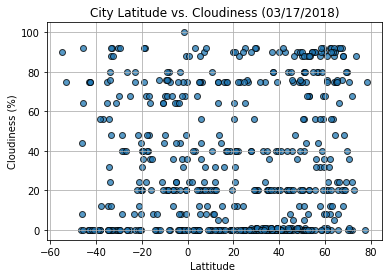

In [16]:
cloudPlot = plt.scatter(data_df['Lattitude'],data_df['Cloudiness'],alpha=0.75, edgecolors='black')
plt.title('City Latitude vs. Cloudiness (03/17/2018)')
plt.xlabel('Lattitude ')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Cloud.png')

#### Latitude vs. Wind Speed Plot

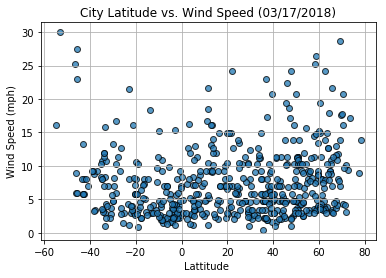

In [17]:
cloudPlot = plt.scatter(data_df['Lattitude'],data_df['Wind Speed'],alpha=0.75, edgecolors='black')
plt.title('City Latitude vs. Wind Speed (03/17/2018)')
plt.xlabel('Lattitude ')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('windSpeed.png')